## MatplotlibとSeabornをインポート

matplotlibの中のpyplotを読み込みます。

また、Jupyter Notebook内にグラフを出力させるために`%matplotlib inline`を記述します。

日本語に対応できるように`japanize_matplotlib`も読み込みます。

続いてSeabornをインポートします。

In [3]:
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline
import seaborn as sns

**ポイント**

`seaborn`は`sns`という名前でインポートすることが多いです。

## 使用するデータを読み込む

Pythonライブラリである「Pandas」をインポートしてcsvファイルをDataFrameとして読み込みます。

使用するデータは、
seabornのライブラリの中から、サンプルのデータセットをダウンロードできるので、比較的有名な

- iris（アヤメのサンプルデータ）
- flight（飛行機の乗客数）

二つを使用してきます。

In [4]:
import pandas as pd

In [7]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


それぞれのカラムは次の情報を表しています。

- sepal_length : ガクの長さ
- sepal_width : ガクの幅
- petal_length : 花弁の長さ
- petal_width : 花弁の幅
- species : アヤメの種類

In [10]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


それぞれのカラムは次の情報を表しています。

- year : 年
- month : 月
- passengers : 乗客数

## 箱ひげ図を作成する | boxplot

`figure`オブジェクトと`axes`オブジェクトを作成することで、グラフを描画するスペースの大きさ（幅、高さ）とその中にいくつのグラフを作成するかを指定することが出来ます。

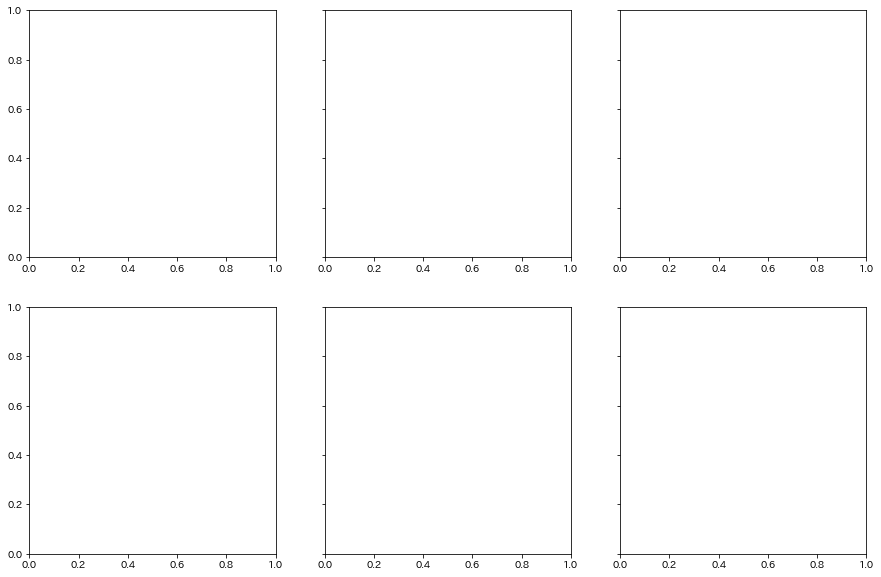

In [11]:
# figureオブジェクトとaxesオブジェクトの作成
fig, ax = plt.subplots(2, 3, figsize=(15,10), sharey=True)

**ポイント**

- `plt.subplots()`の引数に行と列を指定します。（今回は２行×３列で６つのグラフを作成するようにしています。）
- 次に引数`figsize`に幅と高さを指定します。
- 引数`sharey`に`True`を指定するとy軸のメモリを共有します。
- x軸のメモリを共有する場合は、`sharex`を使用します。

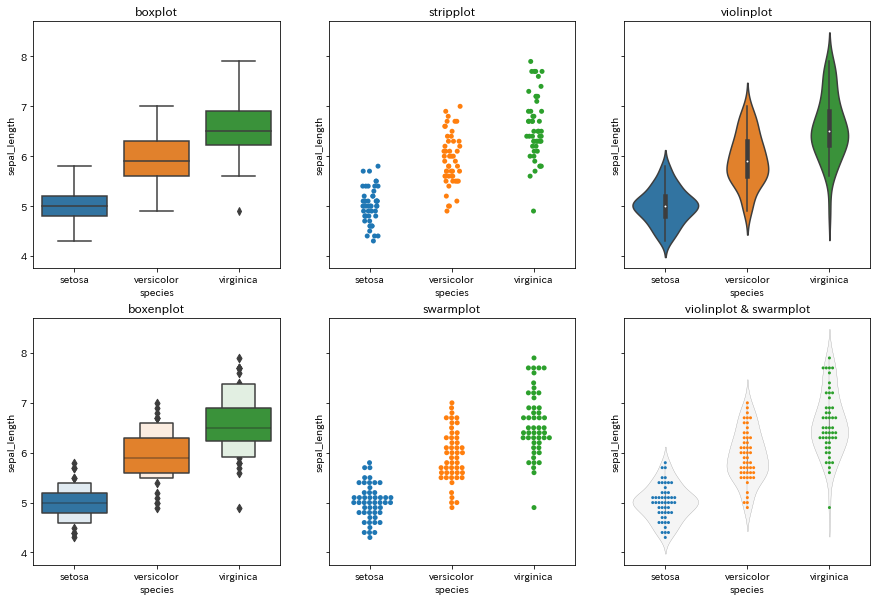

In [15]:
# figureオブジェクトとaxesオブジェクトの作成
fig, ax = plt.subplots(2, 3, figsize=(15,10), sharey=True)

# グラフの作成
sns.boxplot(x="species", y="sepal_length", data=iris, ax=ax[0,0])
sns.stripplot(x="species", y="sepal_length", data=iris, ax=ax[0,1])
sns.violinplot(x="species", y="sepal_length", data=iris, ax=ax[0,2])
sns.boxenplot(x="species", y="sepal_length", data=iris, ax=ax[1,0])
sns.swarmplot(x="species", y="sepal_length", data=iris, ax=ax[1,1])
sns.violinplot(x="species", y="sepal_length", data=iris, ax=ax[1,2], color='whitesmoke', linewidth=0.3)
sns.swarmplot(x="species", y="sepal_length", data=iris, ax=ax[1,2], size=3)

# タイトルの追加
ax[0,0].set_title("boxplot")
ax[0,1].set_title("stripplot")
ax[0,2].set_title("violinplot")
ax[1,0].set_title("boxenplot")
ax[1,1].set_title("swarmplot")
ax[1,2].set_title("violinplot & swarmplot")

# グラフの表示
plt.show()

- `sns.boxplot()`の引数`x`にアヤメの種類、`y`にガクの長さを指定してみます。
- 引数`data`には元のデータを指定します。
- 引数`ax`には何行目、何列目にグラフを配置するかを指定します。角括弧[]で囲み、[0,0]から始まります。

箱ひげ図にもさまざまな種類があるため、目的に応じて使い分ける必要があります。

個人的には`boxplot`が使えれば問題ないと思います。

## ヒストグラムを作成する | distplot

y軸に連続変数として、ガクの幅を指定してみます。

In [22]:
sepal_width = iris['sepal_width']
sepal_width.head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

/Users/nakadakyota/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nakadakyota/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nakadakyota/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

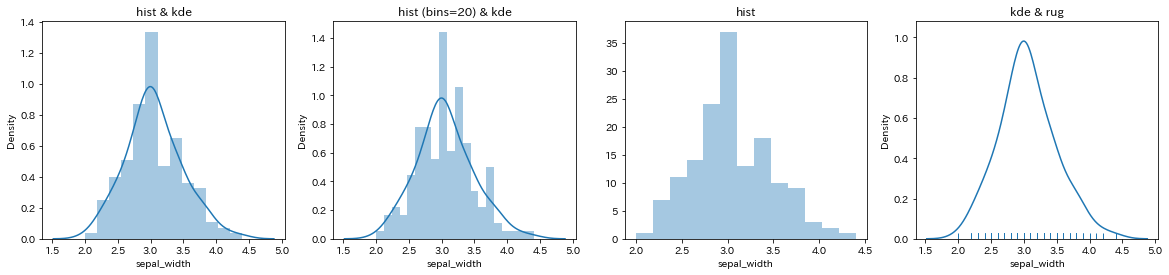

In [25]:
# figureオブジェクトとaxesオブジェクトの作成
fig, ax = plt.subplots(1,4, figsize=(20,4)) #１行×４列のグラフを作成

# グラフの作成
sns.distplot(sepal_width, ax=ax[0])
sns.distplot(sepal_width, ax=ax[1], bins=20) #階級の数を「20」に指定
sns.distplot(sepal_width, ax=ax[2], kde= False) #カーネル密度推定を非表示に指定
sns.distplot(sepal_width, ax=ax[3], hist=False, rug=True) #ヒストグラムを非表示、ラグを表示に設定

# タイトルの追加
ax[0].set_title("hist & kde")
ax[1].set_title("hist (bins=20) & kde")
ax[2].set_title("hist")
ax[3].set_title("kde & rug")

# グラフの表示
plt.show()

**ポイント**

- `sns.distplot()`の最初の引数にSeries型でデータを指定します。
- 引数`bins`には階級の数を指定します。
- 引数`kde`に`False`を指定すると、カーネル密度推定（曲線で表されているグラフ）を非表示にします。
- 引数`hist`に`False`を指定すると、ヒストグラムを非表示にします。
- 引数`rug`に`True`を指定すると、ラグを表示します。

## 散布図を作成する | scatterplot

x軸にガクの長さ、y軸にガクの幅を指定して散布図を作成してみます。

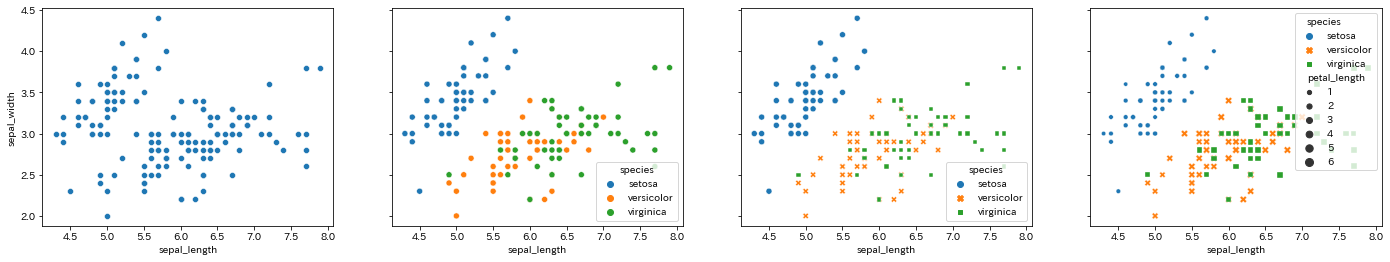

In [26]:
# figureオブジェクトとaxesオブジェクトの作成
fig, ax = plt.subplots(1,4, figsize=(24,4), sharey=True)

# グラフの作成
sns.scatterplot(x="sepal_length", y="sepal_width", data=iris, ax=ax[0])
sns.scatterplot(x="sepal_length", y="sepal_width", data=iris, ax=ax[1], hue='species')
sns.scatterplot(x="sepal_length", y="sepal_width", data=iris, ax=ax[2], hue='species', style='species')
sns.scatterplot(x="sepal_length", y="sepal_width", data=iris, ax=ax[3], hue='species', style='species', size='petal_length')

# グラフの表示
plt.show()

**ポイント**

- `sns.scatterplot()`の引数xにガクの長さ、yにガクの幅を指定します。
- 引数`hue`に新たな変数（アヤメの種類）を指定することで、各アヤメの種類の情報も加えて可視化することが出来ます。
- 引数`style`に`hue`で指定した変数を指定すると、散布図のマーカーを各種類ごとに変えることが出来ます。
- 引数`size`にカラムを指定すると、カラムのデータに基づいてマーカーのサイズを変更して、凡例を分かりやすくします。

## 散布図行列を作成する | pairplot

`sns.pairplot()`の引数`data`に元のデータを指定し、`hue`にプロットしたい変数を指定します。

複数の散布図を行列に整列して表示させたものが、散布図行列です。

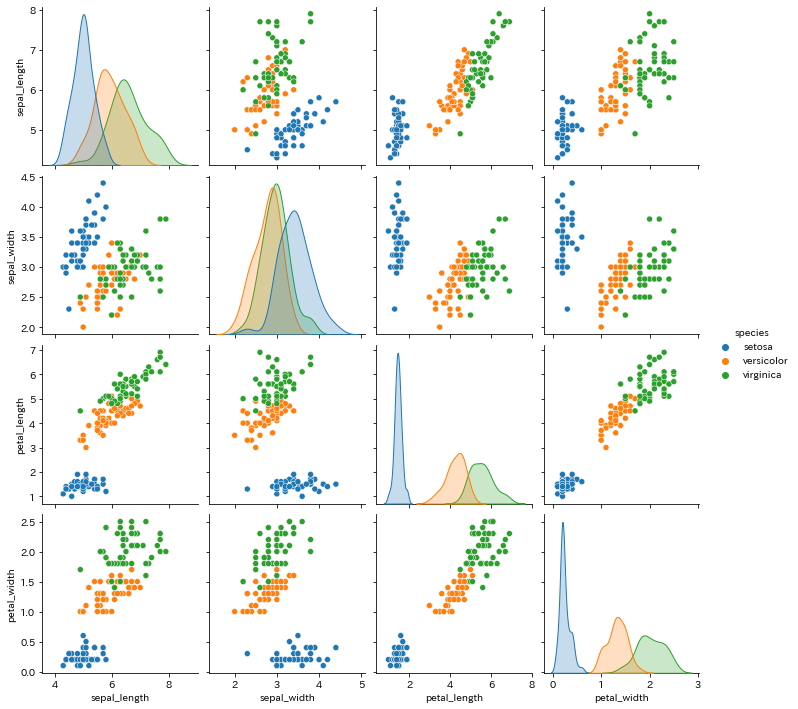

In [27]:
# グラフの作成
sns.pairplot(data=iris, hue='species')

# グラフの表示
plt.show()

## ヒートマップを作成する | headmap

ヒートマップとはデータを可視化するために、行列型の数字データの強弱を色で視覚化する方法です。

「飛行機の乗客数」のデータを使用して、ヒートマップを作成してみます。

In [32]:
# 年と月ごとに乗客を集約した2次元配列データの作成
flights_matrix = flights.pivot_table(index='year', columns='month', values='passengers')
flights_matrix

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


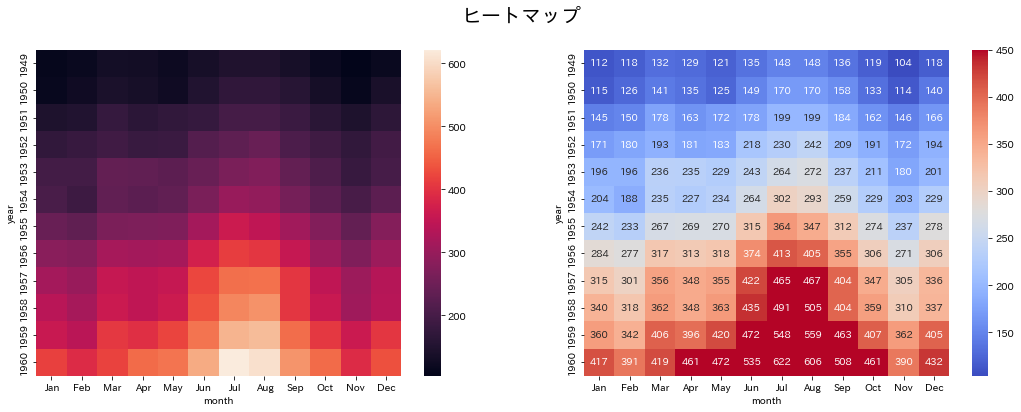

In [36]:
# figureオブジェクトとaxesオブジェクトの作成
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# グラフの作成
sns.heatmap(data=flights_matrix, ax=ax[0])
sns.heatmap(data=flights_matrix, ax=ax[1], cmap='coolwarm', vmax=450, fmt='d', annot=True)

# 図全体のタイトルの追加
fig.suptitle('ヒートマップ', fontsize=20)

# グラフの表示
plt.show()

**ポイント**

- 引数`cmap`には値の大小をどの色に変換するかを指定します。
- 公式ドキュメントを参照することが出来ます。

https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

- 引数`vmax`にはカラーマップと値の範囲を関連付ける必要がある際の最大値を指定します。指定しない場合、データや他の引数から推測されます。
- 最小値を指定する場合は、`vmin`に値を指定します。
- 引数`annot`に`True`を指定すると、ヒートマップ内に値を出力します。
- `annot`が`True`の場合に、引数`fmt`に`d`を指定すると値を１０進整数で表示します。